## Problem statement

- There are many among us who prefer to spend more time with books than anything else. Here we explore a big database of books. Books of different genres, from thousands of authors. 
- In this challenge, we use the books dataset to build a Machine Learning model to predict the price of books based on a given set of features. 
- Size of training set: 6237 records Size of test set: 1560 records 
- FEATURES: Title: The title of the book. Author: The author(s) of the book. Edition: The edition of the book eg (Paperback,– Import, 26 Apr 2018). Reviews: The customer reviews about the book. Ratings: The customer ratings of the book. Synopsis: The synopsis of the book. Genre: The genre the book belongs to. BookCategory: The department the book is usually available at. Price: The price of the book (Target variable).

In [97]:
# for analysis and data processing
import pandas as pd
import numpy as np
import seaborn as sns
import ppscore as pps
import datetime as dt
import matplotlib.pyplot as plt
from IPython.display import display
from sklearn.preprocessing import StandardScaler
# for modelling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold, StratifiedShuffleSplit
from sklearn.model_selection import RandomizedSearchCV
import warnings
warnings.filterwarnings('ignore')

### Data Preprocessing and EDA

In [66]:
def read_data(path_to_csv_file):
    '''
    Reads csv files from specified paths

    Parameters:
            path to csv file locations
    Returns:
            dataframes of imported csv files
    '''
    # Read CSV files
    df = pd.read_excel(path_to_csv_file)
    
    return df

books_train = read_data('Data_Train.xlsx')
books_test = read_data('Data_Test.xlsx')

In [67]:
def df_snapshot(df):
    '''
    Returns top 5 rows of the dataframe.

    Parameters:
        df (DataFrame): Pandas dataframe
    '''
    return display(df.head())

print(f'train:')
df_snapshot(books_train)
print(f'test:')
df_snapshot(books_test)

train:


,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0 out of 5 stars,8 customer reviews,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,220.00
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9 out of 5 stars,14 customer reviews,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93
2,Leviathan (Penguin Classics),Thomas Hobbes,"Paperback,– 25 Feb 1982",4.8 out of 5 stars,6 customer reviews,"""During the time men live without a common Pow...",International Relations,Humour,299.00
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,"Paperback,– 5 Oct 2017",4.1 out of 5 stars,13 customer reviews,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,"Hardcover,– 10 Oct 2006",5.0 out of 5 stars,1 customer review,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography",965.62


test:


,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory
0,The Complete Sherlock Holmes: 2 Boxes sets,Sir Arthur Conan Doyle,"Mass Market Paperback,– 1 Oct 1986",4.4 out of 5 stars,960 customer reviews,A collection of entire body of work of the She...,Short Stories (Books),"Crime, Thriller & Mystery"
1,Learn Docker - Fundamentals of Docker 18.x: Ev...,Gabriel N. Schenker,"Paperback,– Import, 26 Apr 2018",5.0 out of 5 stars,1 customer review,Enhance your software deployment workflow usin...,Operating Systems Textbooks,"Computing, Internet & Digital Media"
2,Big Girl,Danielle Steel,"Paperback,– 17 Mar 2011",5.0 out of 5 stars,4 customer reviews,"'Watch out, world. Here I come!'\nFor Victoria...",Romance (Books),Romance
3,Think Python: How to Think Like a Computer Sci...,Allen B. Downey,"Paperback,– 2016",4.1 out of 5 stars,11 customer reviews,"If you want to learn how to program, working w...",Programming & Software Development (Books),"Computing, Internet & Digital Media"
4,Oxford Word Skills: Advanced - Idioms & Phrasa...,Redman Gairns,"Paperback,– 26 Dec 2011",4.4 out of 5 stars,9 customer reviews,"Learn and practise the verbs, prepositions and...",Linguistics (Books),"Language, Linguistics & Writing"


In [10]:
def data_types(df):
    '''
    Returns datatype of fields in a dataframe.

    Parameters:
        df (DataFrame): Pandas dataframe
    '''
    return df.info()

print(f'train:')
data_types(books_train)
print(f'test:')
data_types(books_test)

train:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6237 entries, 0 to 6236
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Title         6237 non-null   object 
 1   Author        6237 non-null   object 
 2   Edition       6237 non-null   object 
 3   Reviews       6237 non-null   object 
 4   Ratings       6237 non-null   object 
 5   Synopsis      6237 non-null   object 
 6   Genre         6237 non-null   object 
 7   BookCategory  6237 non-null   object 
 8   Price         6237 non-null   float64
dtypes: float64(1), object(8)
memory usage: 438.7+ KB
test:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Title         1560 non-null   object
 1   Author        1560 non-null   object
 2   Edition       1560 non-null   object
 3   Reviews       1560 non-null   obj

In [11]:
def null_checker(df):
    '''
    Returns the count of rows found in the data frame where there is a null present.

    Parameters:
        df (Dataframe): Pandas dataframe

    Returns:
        Prints the null count, null percentage, and row count per column.
    '''
    row_count = len(df)
    null_counts = df.isnull().sum().sort_values(ascending=False)
    null_percentages = (null_counts / row_count) * 100
    combined = pd.concat([null_counts, null_percentages], axis=1, keys=['Null Count', 'Null Percentage'])
    combined['Row Count'] = row_count
    print(combined)

# check nulls in train
print(f'train:')
null_checker(books_train)
print(f'test:')
null_checker(books_test)

train:
              Null Count  Null Percentage  Row Count
Title                  0              0.0       6237
Author                 0              0.0       6237
Edition                0              0.0       6237
Reviews                0              0.0       6237
Ratings                0              0.0       6237
Synopsis               0              0.0       6237
Genre                  0              0.0       6237
BookCategory           0              0.0       6237
Price                  0              0.0       6237
test:
              Null Count  Null Percentage  Row Count
Title                  0              0.0       1560
Author                 0              0.0       1560
Edition                0              0.0       1560
Reviews                0              0.0       1560
Ratings                0              0.0       1560
Synopsis               0              0.0       1560
Genre                  0              0.0       1560
BookCategory           0         

In [68]:
def process_reviews_and_ratings(df):
    """
    Converts the 'Reviews' column to a numeric scale and extracts integers from the 'Ratings' column.

    """
    df['Review_Score'] = df['Reviews'].str.extract('(\d.\d)').astype(float)
    df['Num_Ratings'] = df['Ratings'].str.extract('(\d+)').astype(int)
    return df

books_train = process_reviews_and_ratings(books_train)
books_test = process_reviews_and_ratings(books_test)

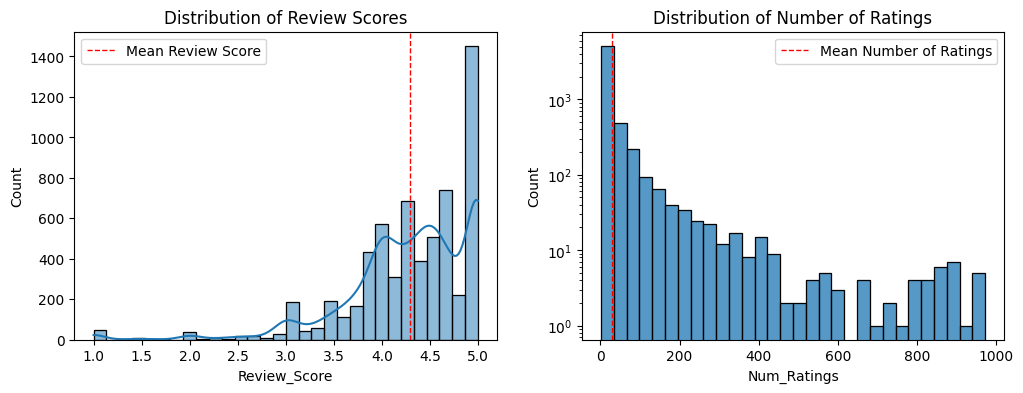

In [26]:
# Plotting distributions of Review Scores and Number of Ratings
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Plotting Review Scores
sns.histplot(books_train['Review_Score'], bins=30, kde=True, ax=axes[0])
axes[0].set_title('Distribution of Review Scores')
axes[0].axvline(books_train['Review_Score'].mean(), color='red', linestyle='dashed', linewidth=1, label='Mean Review Score')
axes[0].legend() 

# Plotting Number of Ratings
sns.histplot(books_train['Num_Ratings'], bins=30, kde=False, ax=axes[1])
axes[1].set_title('Distribution of Number of Ratings')
axes[1].axvline(books_train['Num_Ratings'].mean(), color='red', linestyle='dashed', linewidth=1, label='Mean Number of Ratings')
axes[1].legend() 
axes[1].set_yscale('log') 

plt.show()

- Review Scores are skewed towards higher ratings, with a mean of approximately 4.29.
- Number of Ratings varies significantly, with a mean of around 30 but a median of only 6, indicating a skewed distribution with a few books having a very high number of reviews.

In [84]:
def extract_edition_type_and_publication_date(df):
    """
    Extracts the type of edition (e.g., Paperback, Hardcover) and publication date from the 'Edition' column.
    Fills missing publication years with the mean publication year and ensures type is int.

    """
    df['Edition_Type'] = df['Edition'].str.extract(r'(\w+)')
    df['Publication_Year'] = df['Edition'].str.extract(r'(\d{4})').astype(float)
    mean_year = int(df['Publication_Year'].mean(skipna=True))
    df['Publication_Year'] = df['Publication_Year'].fillna(mean_year).astype(int)
    
    return df

books_train = extract_edition_type_and_publication_date(books_train)
books_test = extract_edition_type_and_publication_date(books_test)


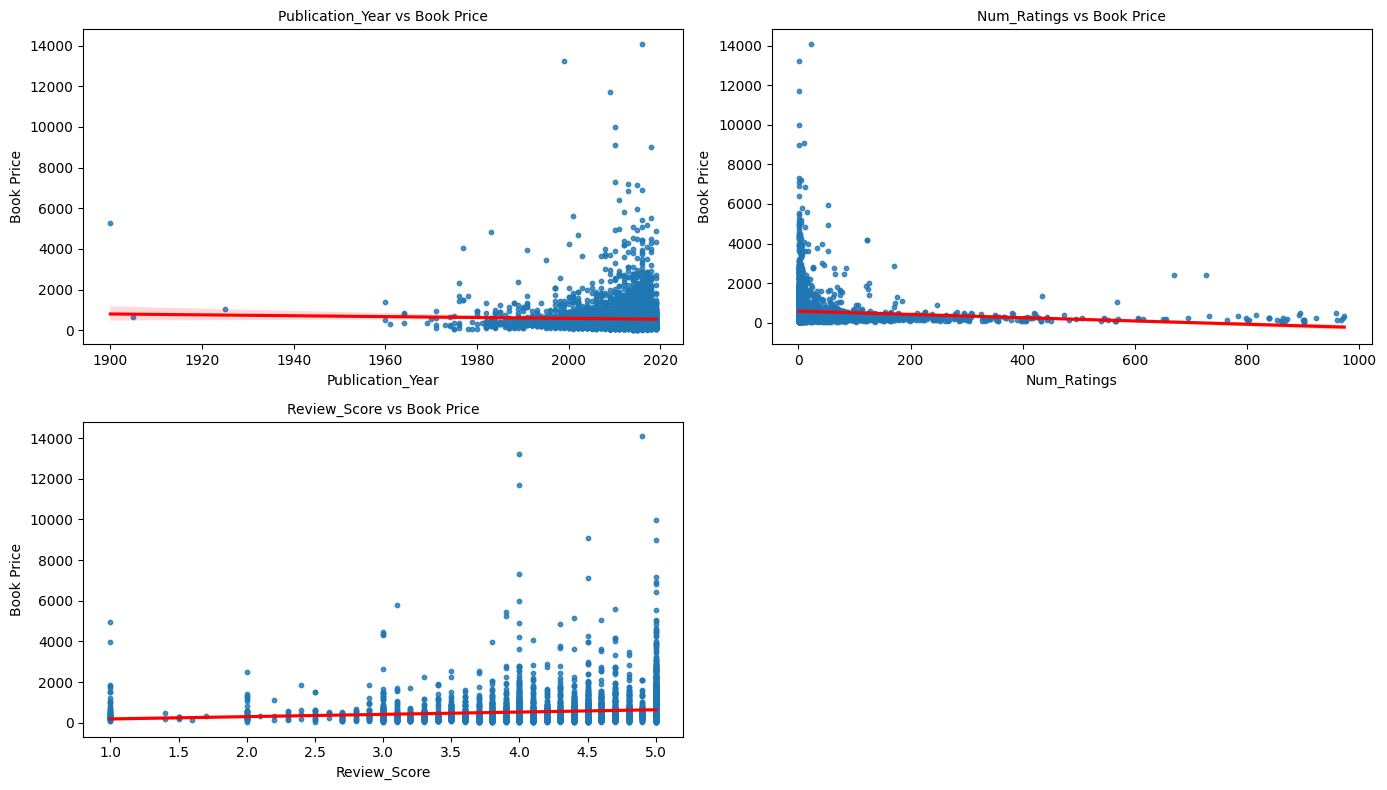

In [38]:
# Define the numerical columns
numerical_cols = ['Publication_Year', 'Num_Ratings', 'Review_Score', 'Price']

# Calculate the number of plots (excluding 'Price' as it's the y-axis)
num_plots = len(numerical_cols[:-1])
n_cols = 2
n_rows = (num_plots + 1) // n_cols

# Create a subplot grid
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(14, n_rows * 4))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
axes = axes.flatten()

# Plot each numerical column against 'Price'
for i, col in enumerate(numerical_cols[:-1]):
    sns.regplot(data=books_train, x=col, y='Price', ax=axes[i], scatter_kws={"s": 10}, line_kws={"color": "red"})
    axes[i].set_title(f'{col} vs Book Price', fontsize=10)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Book Price')

# Remove any unused axes
for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axes[j])

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

- Looking at Publication year, the majority of books, especially those published after 2000, are clustered at lower price points. This could indicate that newer books are priced more competitively or that there is a wider availability of affordable editions.
- The distribution is heavily right-skewed with most books having fewer than 200 ratings, yet these books span a wide range of prices. This might suggest that the number of ratings, which could be a proxy for popularity, does not necessarily correlate with higher prices.
- The distribution of review scores is left-skewed with a concentration of scores around 4.0 to 5.0, yet these higher-rated books don’t necessarily command higher prices. This could suggest that while quality (as perceived through reviews) is high, it does not impact the pricing structure directly.

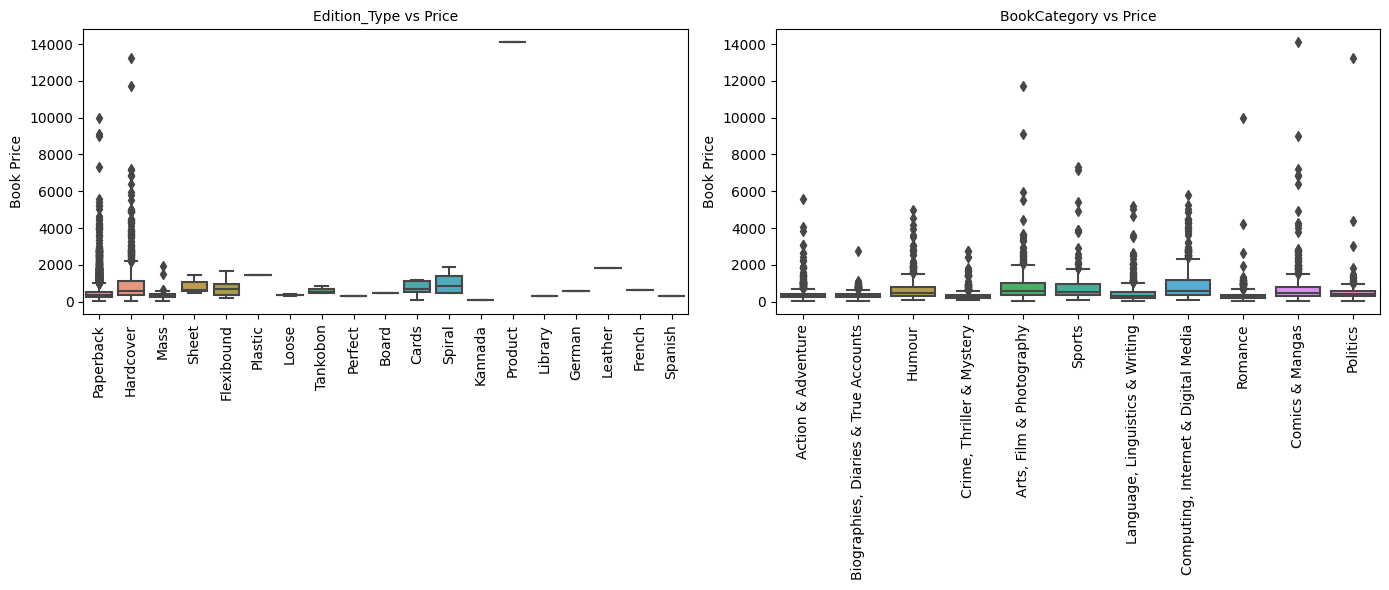

In [53]:
# Bivariate Analysis: categorical features vs price
categorical_cols = ['Edition_Type', 'BookCategory']
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6)) 
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, col in enumerate(categorical_cols):
    sns.boxplot(data=books_train, x=col, y='Price', ax=axes[i])
    axes[i].set_title(f'{col} vs Price', fontsize=10)
    axes[i].set_xlabel('')  
    axes[i].set_ylabel('Book Price')
    axes[i].tick_params(axis='x', rotation=90)  

plt.tight_layout()
plt.show()



- Paperbacks show a lower median price compared to other edition types, which is expected as paperbacks are typically mass-market products designed for affordability.These also has numerous outliers with some books priced significantly higher than typical. This could indicate special editions or paperbacks with high collectible value.
- Hardcover books also have higher median prices, these typically command higher prices due to the quality and durability of the binding, making them more desirable for collectors and those looking for durable editions.

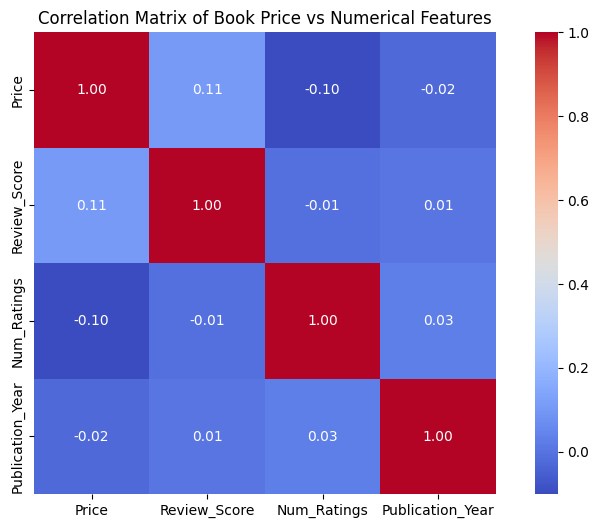

In [72]:
def correlation(user_features_train):
    """
    Plots correlation matrix and boxplots for user features including churn status.

    """
    plt.figure(figsize=(10, 6))
    corr = user_features_train.corr()
    sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
    plt.title('Correlation Matrix of Book Price vs Numerical Features')
    plt.show()

correlation(books_train)

- A very low positive correlation between review score and price, suggesting higher reviews mean higher prices but this correlation is very weak and not significant
- Negative and very weak correlation between price and number of ratings, which suggest that lower rated books tend to have higher prices, but also this correlation is very weak and not significant.
- Negative correlation as well between price and publication year, most recently published books tend to have lower prices.

In [74]:
def calculate_predictive_power(df, target):
    """
    Calculates the predictive power score (PPS) for variables in a dataframe against a target variable.
    
    """
    predictors_df = pps.predictors(df, target)
    sorted_predictors = predictors_df.sort_values(by="ppscore", ascending=False)
    
    return sorted_predictors

data2 = books_train.drop(['Title','Author','Edition','Reviews','Ratings','Synopsis','Genre'],axis=1)
predictors_df = calculate_predictive_power(data2, "Price")
predictors_df

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,BookCategory,Price,0,regression,True,mean absolute error,323.146246,337.152577,DecisionTreeRegressor()
1,Review_Score,Price,0,regression,True,mean absolute error,323.146246,360.895633,DecisionTreeRegressor()
2,Num_Ratings,Price,0,regression,True,mean absolute error,323.146246,365.620659,DecisionTreeRegressor()
3,Edition_Type,Price,0,regression,True,mean absolute error,323.146246,360.912751,DecisionTreeRegressor()
4,Publication_Year,Price,0,regression,True,mean absolute error,320.332776,372.635772,DecisionTreeRegressor()


Even though the correlation and predictive power of these features is not that strong, for modelling we will use BookCategory, Review_Score, Num_Ratings and Publication Year as predictive feature to train the model to predict the price of a book.

In [126]:
def drop_columns(df):
    '''
    Drops columns not necessary for model training
    '''

    df = df.drop(['Title','Author','Edition','Reviews','Ratings','Synopsis','Genre','Edition_Type'],axis=1)

    return df

train = drop_columns(books_train)
test = drop_columns(books_test)

In [127]:
def encode_book_categories_and_edition_types(df):
    """
    Performs one-hot encoding on the 'BookCategory' and 'Edition_Type' columns of a DataFrame.

    """
    # One-hot encode 'BookCategory' 
    categories_encoded = pd.get_dummies(df['BookCategory'], prefix='Category')
    
    # Drop the original columns to avoid redundancy
    df = df.drop(['BookCategory'], axis=1)
    
    # Concatenate the original DataFrame with the new one-hot encoded columns
    df = pd.concat([df, categories_encoded], axis=1)
    
    return df

train = encode_book_categories_and_edition_types(train)
test = encode_book_categories_and_edition_types(test)

### Modelling

In [128]:
def set_features_and_target(df):
    '''
    Returns two data frames with features and target variables.

    '''
    X = df.drop(['Price'], axis=1)
    y = df['Price']
    
    return X,y
                 
X,y = set_features_and_target(train)
print(X.shape, y.shape)

(6237, 14) (6237,)


In [130]:
def train_test_split_df(X,y):
    '''
    Creates train and test split.

    '''
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = train_test_split_df(X,y)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(4365, 14) (4365,)
(1872, 14) (1872,)


In [131]:
def model_application(X_train, y_train, optimiser):
    """
    Model application. If optimiser is true, a grid search is applied to optimise the model. 
    If optimiser is false, the base model is used.

    """
    if optimiser:
        params = {
            'n_estimators': [100, 150],
            'max_depth': [None, 10, 20],
            'max_features': ['auto', 'sqrt', 'log2'],
            'min_samples_split': [2, 10],
            'min_samples_leaf': [1, 4],
            'bootstrap': [True, False]
        }

        # Use K-fold cross-validation with GridSearch to find the best parameters
        grid = GridSearchCV(RandomForestRegressor(), 
                            param_grid=params, 
                            scoring='neg_mean_squared_error', 
                            n_jobs=-1, cv=5, verbose=1)
        
        # Fitting the model
        grid.fit(X_train, y_train)

        print('Best Score:', -grid.best_score_)  # Making it positive for easier interpretation
        print('Best Params:', grid.best_params_)
        print('Best Estimator:', grid.best_estimator_)

        rf = grid.best_estimator_
    else:
        # Use a base RandomForestRegressor model
        rf = RandomForestRegressor(n_estimators=100, 
                                   max_depth=16,
                                   min_samples_split=10, 
                                   max_features='auto', 
                                   min_samples_leaf=4, 
                                   bootstrap=True)
        rf.fit(X_train, y_train)

    return rf 
optimiser = True
rf = model_application(X_train, y_train, optimiser)

Fitting 5 folds for each of 144 candidates, totalling 720 fits
Best Score: 439532.4646773584
Best Params: {'bootstrap': True, 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 150}
Best Estimator: RandomForestRegressor(max_depth=10, max_features='log2', min_samples_leaf=4,
                      n_estimators=150)


In [132]:
def model_predict(rf, X_test):
    """
    Create y_pred, model prediction based on test set features.

    """
    y_pred = rf.predict(X_test)
    return y_pred

y_pred = model_predict(rf, X_test)

# Print R-squared for training and test sets
print('Training R-squared Score (%):', rf.score(X_train, y_train) * 100)
print('Test R-squared Score (%):', rf.score(X_test, y_test) * 100)

# Print other regression metrics
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)

Training R-squared Score (%): 26.198944961870218
Test R-squared Score (%): 9.774806122783975
Mean Squared Error: 389782.1250357018
Root Mean Squared Error: 624.3253358912337


In [143]:
# Apply trained model to the test set to predict Price of the books in the tese dataset
test_predictions = rf.predict(test)
test['Price'] = test_predictions

In [144]:
test[['Price']].to_csv('C:/Users/leemn/Downloads/predicted_price.csv',index=False)